# SyriaTel Customer Churn Analysis

### Project outline

The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

* state: the state the user lives in
* account length: the number of days the user has this account
* area code: the code of the area the user lives in
* phone number: the phone number of the user
* international plan: true if the user has the international plan, otherwise false
* voice mail plan: true if the user has the voice mail plan, otherwise false
* number vmail messages: the number of voice mail messages the user has sent
* total day minutes: total number of minutes the user has been in calls during the day
* total day calls: total number of calls the user has done during the day
* total day charge: total amount of money the user was charged by the Telecom company for calls during the day
* total eve minutes: total number of minutes the user has been in calls during the evening
* total eve calls: total number of calls the user has done during the evening
* total eve charge: total amount of money the user was charged by the Telecom company for calls during the evening
* total night minutes: total number of minutes the user has been in calls during the night
* total night calls: total number of calls the user has done during the night
* total night charge: total amount of money the user was charged by the Telecom company for calls during the night
* total intl minutes: total number of minutes the user has been in international calls
* total intl calls: total number of international calls the user has done
* total intl charge: total amount of money the user was charged by the Telecom company for international calls
* customer service calls: number of customer service calls the user has done
* churn: true if the user terminated the contract, otherwise false


Customer churn is the loss of clients or customers. Predicting churn can help the Telecom company for many different reasons. 

*Our goal is to create a model to predic churn and to use this to gain insight for the Telcom company* 

How can I help them to loose less money. What patterns do I see here?

## Import packages and dataset

In [83]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns


from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, precision_recall_curve

In [85]:
df = pd.read_csv('syriatel_churn.csv')

In [86]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [87]:
sum(df["churn"]==1)

483

In [88]:
sum(df["churn"]==0)

2850

In [89]:
483/2850

0.1694736842105263

## Exploratory Data Analysis

#### Churn vs non Churn

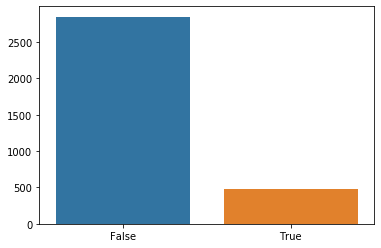

In [90]:
y = df["churn"].value_counts()
sns.barplot(y.index, y.values)

Here I notice Imbalanced data - It is therefore imperative that I consider using some kind of class balancing

In [91]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Churn by state

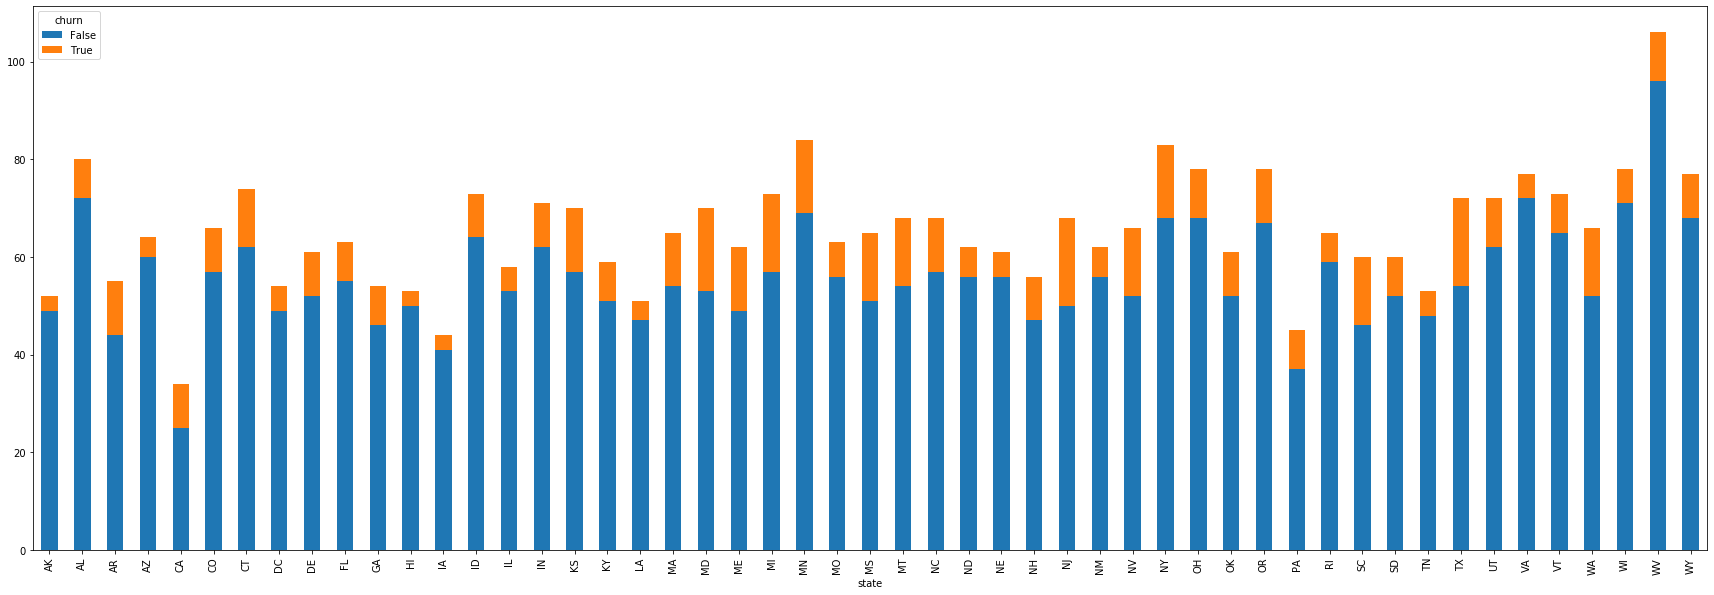

In [92]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))


In [93]:
df["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

#### Churn by international plan

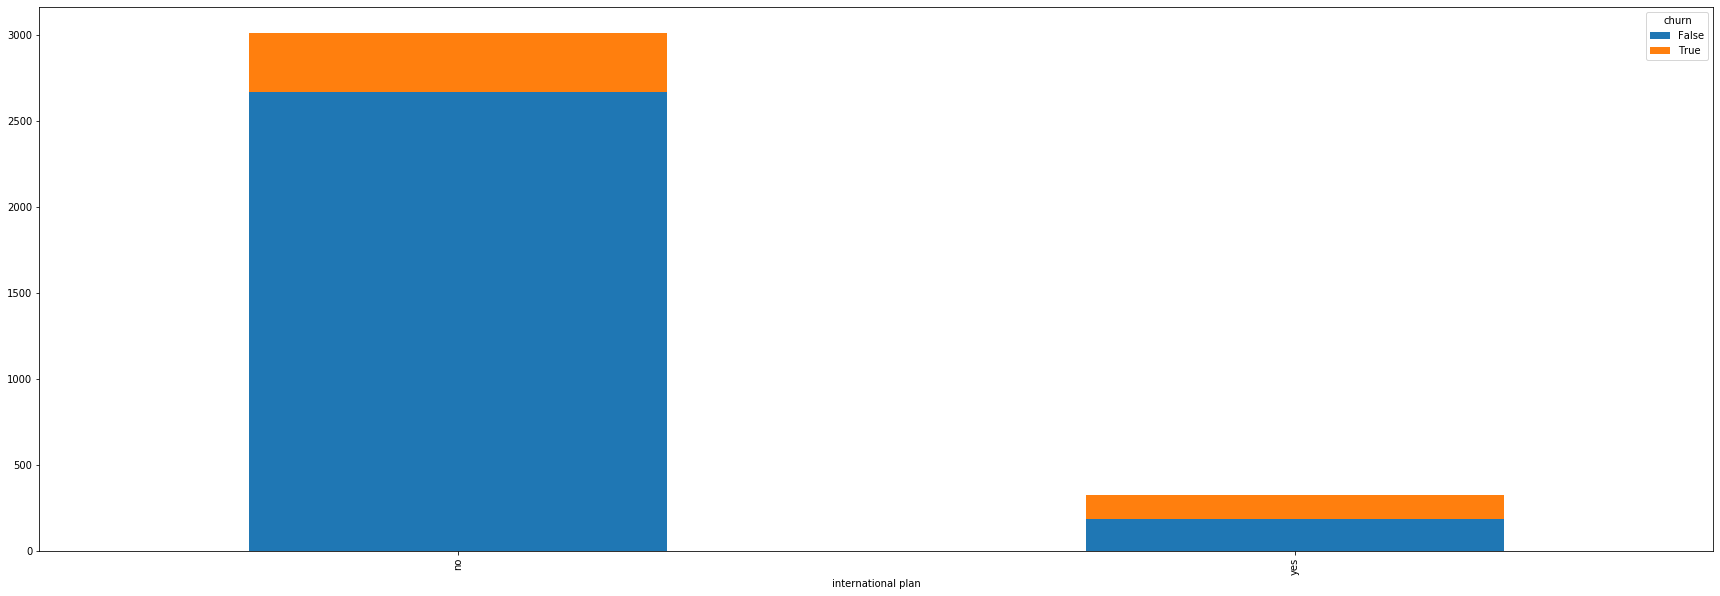

In [94]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))


In [95]:
df.groupby(['international plan', 'churn']).size()


international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64

#### Churn by area

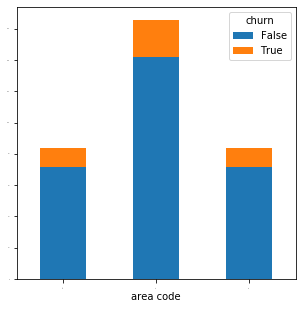

In [96]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5), fontsize = 0.1) 


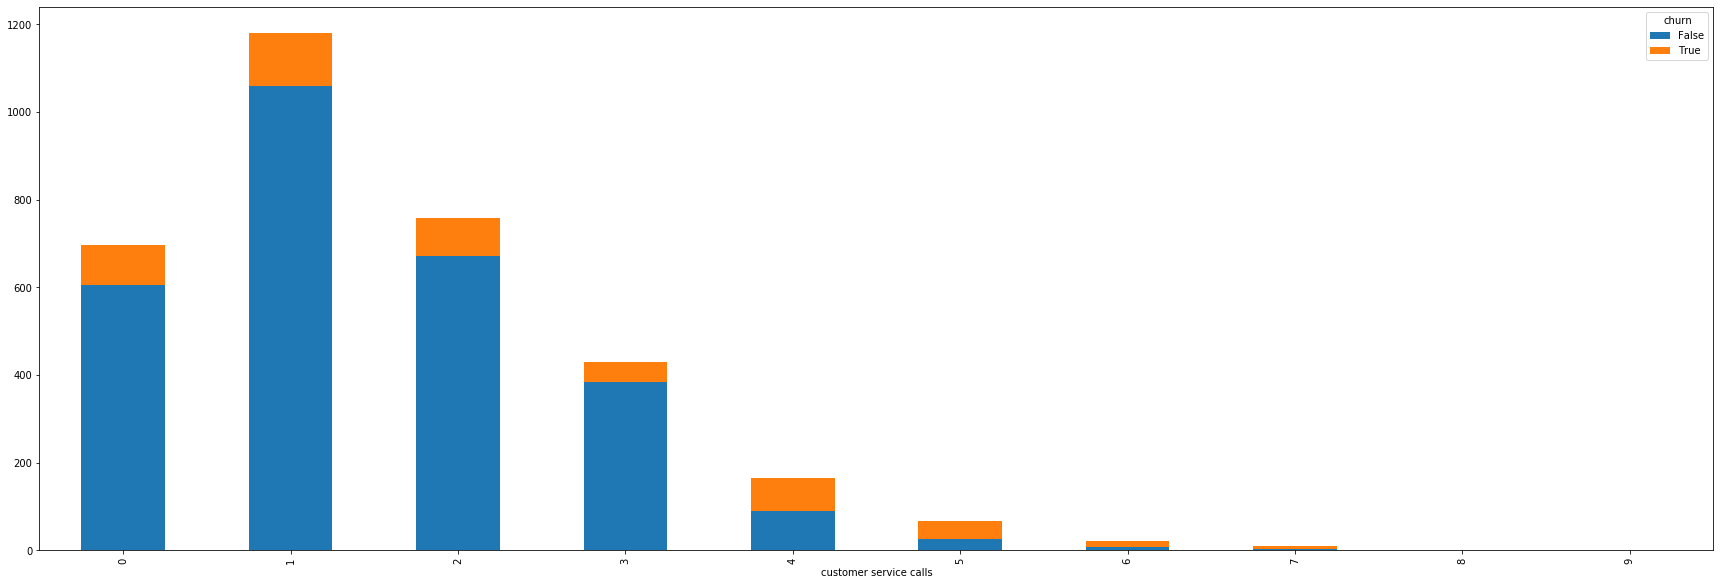

In [97]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))


In [98]:
df.groupby(['customer service calls', 'churn']).size()


customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       False      26
                        True       40
6                       False       8
                        True       14
7                       False       4
                        True        5
8                       False       1
                        True        1
9                       True        2
dtype: int64

## Preparation of the dataset for modelling

#### One-hot encode categorical variables

I have identified the following categorical variables: state, area code, international plan, voice mail plan

In [99]:
enc = OneHotEncoder(handle_unknown='ignore')
state_enc = pd.DataFrame(enc.fit_transform(df[['state']]).toarray())
df = df.join(state_enc)

area_code_enc = pd.DataFrame(enc.fit_transform(df[['area code']]).toarray())
df = df.join(area_code_enc, how = 'left', lsuffix = '_left', rsuffix = '_right')

df.drop(["state","area code"], axis = 1, inplace=True)

print (df.dtypes)

account length             int64
phone number              object
international plan        object
voice mail plan           object
number vmail messages      int64
                          ...   
49                       float64
50                       float64
0_right                  float64
1_right                  float64
2_right                  float64
Length: 73, dtype: object


In [100]:
label_encoder = preprocessing.LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
print (df.dtypes)

account length             int64
phone number              object
international plan         int64
voice mail plan            int64
number vmail messages      int64
                          ...   
49                       float64
50                       float64
0_right                  float64
1_right                  float64
2_right                  float64
Length: 73, dtype: object


Here I are sepparating y from the rest of the dataframe. I need to to this for analysis purposes

In [101]:
y = df['churn'].as_matrix().astype(np.int)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


#### Dropping variables 

Here I drop phone number as i believe that this is random and has no effect on whether a customer churns.

In [102]:
df.drop(["phone number","churn"], axis = 1, inplace=True)

In [103]:
df.shape

(3333, 71)

## Test Train Split 


In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [105]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)


(2999, 71) (334, 71) (2999,) (334,)


In [106]:
pd.DataFrame(xtrain)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,44,45,46,47,48,49,50,0_right,1_right,2_right
664,147,0,0,0,205.3,95,34.90,166.7,128,14.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
819,150,0,0,0,146.3,133,24.87,202.7,95,17.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1132,83,0,1,37,78.5,109,13.35,210.5,101,17.89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1002,93,0,1,32,138.1,91,23.48,167.3,72,14.22,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2555,190,0,0,0,182.2,101,30.97,212.3,95,18.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,103,1,0,0,255.9,128,43.50,140.9,92,11.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1133,64,0,0,0,148.1,73,25.18,164.9,101,14.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2988,105,0,0,0,259.3,96,44.08,175.2,97,14.89,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
179,70,0,0,0,232.1,122,39.46,292.3,112,24.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Balancing weights

w = {0:1.0, 1:5.6}


Then add 'classweight = w' when fitting all your models 


Since I know that the dataset has got about 15% of the entries as 1s and 85% as 0s, I choose to make the 1 outcome approxmately 85/15 times more important for the model to train on to even out the bias

## Model creation

Before creating a model I need to choose the metric thati would like to optimise on. I have chosen to go for the PR-AUC (as opposed to the ROC-AUC). This is becuase from the research I did it is better to use the PR-AUC when the class is very imbalanced which, in our case, it is. PR AUC is the optimal metric to use in a binary classification when I care more about the 1 than the 0.

Precision is asking how many true successes are in all our reported successes. Recall is out of all the true values that went in, how many did I successfully get back out.

https://cosmiccoding.com.au/tutorials/pr_vs_roc_curves

The PR AUC curve is made as follows:

Precision-recall curves plot the positive predictive value (PPV, y-axis) against the true positive rate (TPR, x-axis). These quantities are defined as follows:

𝑃𝑃𝑉=𝑇𝑃/(𝑇𝑃+𝐹𝑃)

𝑇𝑃𝑅=𝑇𝑃/(𝑇𝑃+𝐹𝑁)

This is different to the ROC AUC which is defined as follows.

In ROC curves, the true positive rate (TPR, y-axis) is plotted against the false positive rate (FPR, x-axis). These quantities are defined as follows:

𝑇𝑃𝑅=𝑇𝑃/(𝑇𝑃+𝐹𝑁)

𝐹𝑃𝑅=𝐹𝑃/(𝐹𝑃+𝑇𝑁)

In [107]:
w = {0:1.0, 1:5.6}

### 1) Logistic Regression

In [108]:
lgl = LogisticRegression(random_state=77, class_weight=w)

In [109]:
# define model
# fit it
lgl.fit(xtrain,ytrain)
# test
y_pred = lgl.predict(xtest)

# performance
print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

Confusion Matrix: 
[[216  70]
 [ 16  32]]
Area Under Curve: 0.7109557109557109
PR AUC score: 0.5141481742397558


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
lr = [lgl.__class__, roc_auc_score(ytest, y_pred), auc(lr_recall, lr_precision)]

In [111]:
algo = pd.DataFrame([lr])

In [112]:
algo

,0,1,2
0,<class 'sklearn.linear_model.logistic.Logistic...,0.710956,0.514148


### 3) Decison tree classifier

In [113]:
lgl = DecisionTreeClassifier(class_weight = w)
lgl.fit(xtrain, ytrain)
y_pred = lgl.predict(xtest)

print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

dtc = [lgl.__class__,roc_auc_score(ytest, y_pred), auc(lr_recall, lr_precision)]

Confusion Matrix: 
[[267  19]
 [ 18  30]]
Area Under Curve: 0.7792832167832168
PR AUC score: 0.645568556764023


In [114]:
algo = algo.append([dtc])

### 2) Random Forest Classifier

In [115]:
lgl = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight = w)
lgl.fit(xtrain, ytrain)
y_pred = lgl.predict(xtest)

print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

rfc = [lgl.__class__,roc_auc_score(ytest, y_pred), auc(lr_recall, lr_precision)]

Confusion Matrix: 
[[260  26]
 [ 12  36]]
Area Under Curve: 0.8295454545454545
PR AUC score: 0.6832866525014487


In [116]:
algo = algo.append([rfc])

### 3) KNN 

In [117]:
lgl = KNeighborsClassifier()
lgl.fit(xtrain, ytrain)
y_pred = lgl.predict(xtest)

print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

knc = [lgl.__class__,roc_auc_score(ytest, y_pred), auc(lr_recall, lr_precision)]

Confusion Matrix: 
[[277   9]
 [ 33  15]]
Area Under Curve: 0.6405157342657343
PR AUC score: 0.5181511976047904


In [118]:
algo = algo.append([knc])

### 5) XG Boost Classifier

In [119]:
alg = XGBClassifier(class_weight = w)
alg.fit(xtrain, ytrain)
y_pred = alg.predict(xtest)

print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

predprob = alg.predict_proba(xtest)


xgb = [alg.__class__,roc_auc_score(ytest, y_pred), auc(lr_recall, lr_precision)]



Confusion Matrix: 
[[280   6]
 [ 13  35]]
Area Under Curve: 0.8540938228438227
PR AUC score: 0.8108736794703276


In [120]:
#second column is probablility that it is a 1. I use this for churn 
predprob[1]

array([0.8251676, 0.1748324], dtype=float32)

In [121]:
algo = algo.append([xgb])

In [122]:
algo

,0,1,2
0,<class 'sklearn.linear_model.logistic.Logistic...,0.710956,0.514148
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.779283,0.645569
0,<class 'sklearn.ensemble.forest.RandomForestCl...,0.829545,0.683287
0,<class 'sklearn.neighbors.classification.KNeig...,0.640516,0.518151
0,<class 'xgboost.sklearn.XGBClassifier'>,0.854094,0.810874


In [123]:
algo.sort_values([1], ascending=[False])

,0,1,2
0,<class 'xgboost.sklearn.XGBClassifier'>,0.854094,0.810874
0,<class 'sklearn.ensemble.forest.RandomForestCl...,0.829545,0.683287
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.779283,0.645569
0,<class 'sklearn.linear_model.logistic.Logistic...,0.710956,0.514148
0,<class 'sklearn.neighbors.classification.KNeig...,0.640516,0.518151


XGB has the highest PR AUC - I will optimize this and move futher on. 

## Model Evaluation

## Final Model Selection

I will now optimize on the XGBoost model with a gridsearch. 

Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination. 

In [124]:
alg = XGBClassifier()

In [125]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.8],
    'n_estimators': [100],
    'class_weight': [w]
}

In [126]:
grid_alg = GridSearchCV(alg, param_grid, scoring='roc_auc', cv=None, n_jobs=1)
grid_alg.fit(xtrain, ytrain)

best_parameters = grid_alg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_alg.predict(xtrain)
test_preds = grid_alg.predict(xtest)
training_accuracy = accuracy_score(ytrain, training_preds)
test_accuracy = accuracy_score(ytest, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

print(f'Confusion Matrix: \n{confusion_matrix(ytest, test_preds)}')
print(f'Area Under Curve: {roc_auc_score(ytest, test_preds)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,test_preds)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
class_weight: {0: 1.0, 1: 5.6}
learning_rate: 0.1
max_depth: 5
min_child_weight: 1
n_estimators: 100
subsample: 0.8

Training Accuracy: 98.17%
Validation accuracy: 95.21%
Confusion Matrix: 
[[282   4]
 [ 12  36]]
Area Under Curve: 0.868006993006993
PR AUC score: 0.8429640718562873


In [127]:
alg = XGBClassifier(class_weight= w, leaning_rate = 0.1, max_depth = 5, min_child_weight = 1, n_estimators = 100, subsample = 0.8)
alg.fit(xtrain, ytrain)
y_pred = alg.predict(xtest)

print(f'Confusion Matrix: \n{confusion_matrix(ytest, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(ytest, y_pred)}')
lr_precision, lr_recall, _ = precision_recall_curve(ytest,y_pred)
print(f'PR AUC score: {auc(lr_recall, lr_precision)}')

Confusion Matrix: 
[[282   4]
 [ 12  36]]
Area Under Curve: 0.868006993006993
PR AUC score: 0.8429640718562873


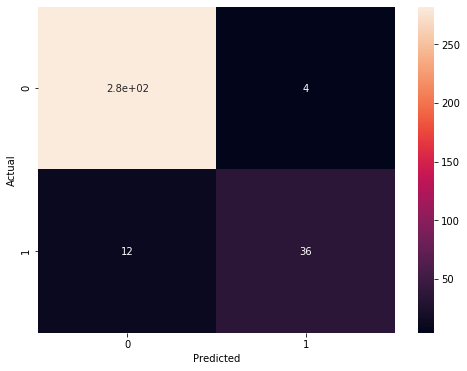

In [128]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data = confusion_matrix(ytest, y_pred),annot = True)
ax.set_ylim([2,0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79

Positive = churns, negative = doesn't churn

36 - a customer churns and the model predict that it churns - True positive

2.8e+02 - a customer doesnt churn and the model predict that it doesnt churns - true negative 

12 - a customer churns and the model predicrt that it doesnt churn - flase positive

4 - a customer doenst churn and the model predict that it churn - false negative

In [129]:
print(classification_report(ytest, y_pred,))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       286
           1       0.90      0.75      0.82        48

    accuracy                           0.95       334
   macro avg       0.93      0.87      0.90       334
weighted avg       0.95      0.95      0.95       334



Precision - ability of a classifier not to label an instance positive that is actually negative and vice versa (Precision = TP/(TP + FP))

Recall - ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 score - weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

macro avg - function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset. 

weighted avg - says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset

Customer service calls and total international calls stand out to me the most over here. More detail is explained on the non-technical presentation

In [130]:
featureimp = alg.feature_importances_
featureimp

array([0.01929807, 0.0872758 , 0.10971142, 0.02121247, 0.07802706,
       0.02175249, 0.        , 0.05615872, 0.01991858, 0.        ,
       0.02795794, 0.02184009, 0.        , 0.05448233, 0.07624202,
       0.        , 0.10571975, 0.        , 0.00988252, 0.        ,
       0.01025189, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01172966, 0.        ,
       0.01147407, 0.00999844, 0.        , 0.        , 0.        ,
       0.012566  , 0.        , 0.        , 0.        , 0.01175941,
       0.        , 0.        , 0.02006962, 0.01448061, 0.        ,
       0.        , 0.        , 0.        , 0.02831746, 0.        ,
       0.        , 0.        , 0.02583978, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0092136 , 0.        ,
       0.02096057, 0.        , 0.01618794, 0.01370851, 0.        ,
       0.        , 0.01044942, 0.        , 0.01296417, 0.03021052,
       0.02033908], dtype=float32)

In [131]:
dfimp = pd.DataFrame(data=featureimp, columns=["featureimp"])
dfcol = xtrain.columns.to_frame(index=False, name = "name")
result = pd.concat([dfimp, dfcol], axis=1)
resultsorted = result.sort_values(by=['featureimp'], ascending = False).head(13)

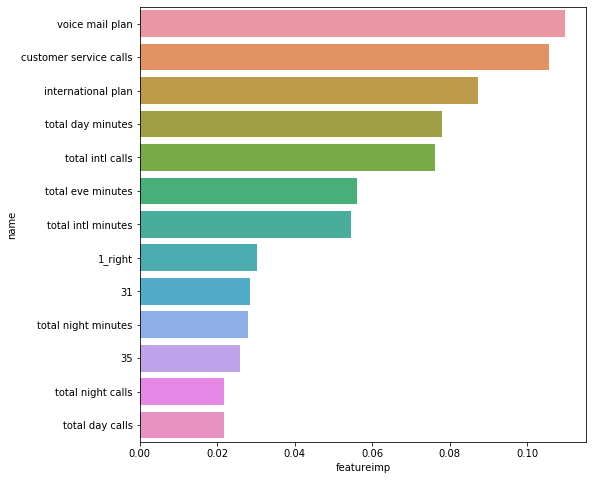

In [132]:
plt.figure(figsize = (8,8))
sns.barplot(x = resultsorted["featureimp"], y = resultsorted["name"])


## Conclusion

After analyzing the data I created a model to predict churn.

I tuned our model to get a PR AUC of 0.84.

The Telco can use this model in the future to predict which of its customer will churn.

I found a number of features that were important to look at to identify churn. To name a few these were:

1. Total time spent on the phone (day, night and evening minutes)
2. Whether the customer has an International plan
3. How many customer service calls a customer makes

In the future if i had more time and more reasources i would have liked to do futher hyper tuning of the model. I would have also liked to spend more time analysing why each feature makes a difference to the model